## Multiclass Classification with Decision Tree on Iris Dataset

##  How a Decision Tree Classifier Works 

###  What is a Decision Tree?

A **Decision Tree** is a flowchart-like structure used for making decisions. Each internal **node** represents a decision on a feature, each **branch** represents the outcome of that decision, and each **leaf node** represents a class label (prediction).

It splits data into subsets based on the value of input features – similar to playing **"20 Questions"**, where each question narrows down the possibilities.

---

###  Real-Life Example: Predicting Fruit Type

Suppose we want to classify a fruit as **Apple**, **Orange**, or **Grape** based on features like:

- **Color** (Red, Orange, Purple)
- **Size** (Large, Small)
- **Texture** (Smooth, Rough)

---

### Example Decision Tree:

           [Color?]
          /   |    \
     Red  Orange  Purple
     /       |       \
 [Size?]   Orange   Grape
 /    \

---

###  Example Input:

A fruit with:
- Color = Red
- Size = Large

**How the tree works:**
1. First, it checks **Color**:
   - Red → go to the left branch
2. Then, it checks **Size**:
   - Large → Predict **Apple**

 **Prediction: Apple**

---

###  How it Chooses the Splits?

The algorithm looks for the **best feature to split the data** based on measures like:

- **Gini Impurity**
- **Information Gain** (used in ID3 algorithm)
- These metrics help choose the question that gives the **purest split**, i.e., separates classes most effectively.

---

###  Final Prediction:

When a new data point is given, it follows the path of decisions (from root to leaf) and reaches a leaf node which gives the **predicted class**.

---

###  Summary

- Decision Trees are **interpretable** and **easy to visualize**.
- They split the data based on features and make decisions step-by-step.
- Best suited for data that can be naturally broken down by rules.

---





## Iris Dataset – Overview

The **Iris dataset** is one of the most famous and widely used datasets in machine learning and statistics.

---

### Key Features:
- **Creator:** Introduced by *Ronald A. Fisher* in 1936  
- **Purpose:** Used for demonstrating classification techniques and pattern recognition  
- **Type:** Multiclass classification dataset  

---

### Dataset Details:

| Feature                | Description                    |
|------------------------|--------------------------------|
| **Number of Instances**| 150 rows (samples)             |
| **Number of Features** | 4 numerical features (continuous) |
| **Number of Classes**  | 3 flower species               |
| **Class Labels**       | - Setosa (0) - Versicolor (1) - Virginica (2)  

---

### Features (Columns):

| Feature Name         | Unit        | Description              |
|----------------------|-------------|--------------------------|
| sepal length (cm)    | centimeters | Length of the sepal      |
| sepal width (cm)     | centimeters | Width of the sepal       |
| petal length (cm)    | centimeters | Length of the petal      |
| petal width (cm)     | centimeters | Width of the petal       |

---

### Objective:
To predict the **species of Iris flower** based on its physical measurements (sepal and petal dimensions).

---

### Why is the Iris Dataset Important?

- **Simple and Clean:** Easy to understand for beginners  
- **Balanced Classes:** Each class has 50 samples  
- **Perfect for Learning:** Great for practicing supervised classification algorithms (Decision Trees, KNN, SVM, etc.)  
- **Multiclass Problem:** Allows working with more than two classes


## Steps: 
1.Import required libraries

2.Load the Iris dataset

3.Split the data into training and test sets

4.Train a Decision Tree classifier

5.Make predictions

6.Evaluate using accuracy, precision, recall, F1-score

7.Plot the confusion matrix and show classification report

##  Step 1: Import necessary libraries


In [3]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report
)
import seaborn as sns
import matplotlib.pyplot as plt

## Step 2: Load the Iris dataset


In [4]:
iris = load_iris()
X = iris.data  # Features
y = iris.target  # Target labels
target_names = iris.target_names  # Class names

## Step 3: Split dataset (80% train, 20% test)


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


## Step 4: Train a Decision Tree Classifier

In [6]:
dt_model = DecisionTreeClassifier(random_state=0)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

## Step 5: Make predictions on test data


In [8]:
y_pred = dt_model.predict(X_test)

## Step 6: Evaluate model performance


In [9]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

In [10]:
#  Print evaluation results
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=target_names))
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision (macro): {precision:.2f}")
print(f"Recall (macro): {recall:.2f}")
print(f"F1 Score (macro): {f1:.2f}")

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Accuracy: 1.00
Precision (macro): 1.00
Recall (macro): 1.00
F1 Score (macro): 1.00


### **Insights**
- The model achieved **perfect classification** across all metrics.
- This could indicate:
  - Clear separation between the classes in the dataset
  - A well-fitting Decision Tree model
- However, it's also worth noting that:
  - The test set size is small (**only 30 samples**), so results may vary with larger data or different splits.
  - Overfitting is **unlikely but still possible** if the model memorized the training data.

---

### Conclusion
This is an **ideal outcome** for a classification task, especially with the clean and well-behaved **Iris dataset**. The model is performing **accurately, consistently, and fairly** across all classes.

## Step 7: Plot Confusion Matrix

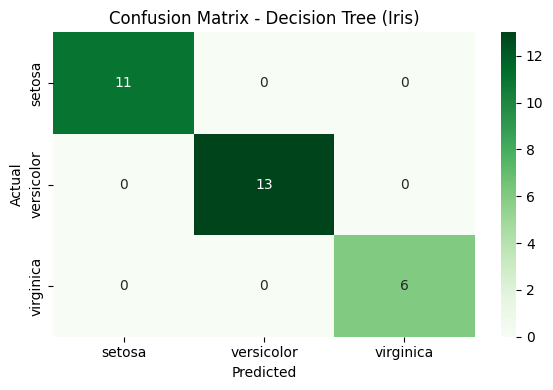

In [11]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=target_names, yticklabels=target_names)
plt.title("Confusion Matrix - Decision Tree (Iris)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()